In [4]:
import sys

sys.path.append("..")

from tools.tools import (
    get_ts_data_for_graph,
    load_sample,
    graph_to_label_tensor,
    score
)
from tools.display_tools import plot_current_state_of_graph,simple_sample_display
from tools.baseline_methods import cross_correlation_for_causal_discovery, calc_lagged_cross_corr
import pickle
import pandas as pd
import numpy as np
from IPython.display import HTML
from hydra import initialize, compose
import matplotlib.pyplot as plt
import networkx as nx
from datetime import date, timedelta, datetime
from dwdweather import DwdWeather
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


### Unfinished script to check out the relationship between amount of water and causal lag

In [10]:
# To keep everything clean we use hydra for HPs.
with initialize(version_base=None, config_path="config/"):
    cfg = compose(config_name='predict_single.yaml')

MissingConfigException: Cannot find primary config 'predict_single.yaml'. Check that it's in your config search path.

Config search path:
	provider=hydra, path=pkg://hydra.conf
	provider=main, path=file:///home/stein/project_repos/river_benchmark_package/paper_content/config
	provider=schema, path=structured://

In [4]:
G = pickle.load(open(cfg.full_graph_path, "rb"))

In [6]:
# Load the raw ts data and the labels for a specific sample:
data = load_sample(p= cfg.data_path, which= G)
ds  =pickle.load(open("../datasets/confounder_5/test.p", "rb"))


In [7]:
example = ds[123]

In [443]:

ds  =pickle.load(open("datasets/random_2/test.p", "rb"))
example = ds[123]

In [9]:
data = load_sample(p= cfg.data_path, which= G)


NameError: name 'cfg' is not defined

In [8]:
# labels can be exported from graph like this:
label = graph_to_label_tensor(example, human_readable=True)
label

Cause                    
             12   166  233  499  555
Effect 12    0.0  0.0  0.0  0.0  0.0
       166   1.0  0.0  1.0  1.0  1.0
       233   0.0  0.0  0.0  0.0  0.0
       499   0.0  0.0  0.0  0.0  0.0
       555   0.0  0.0  1.0  0.0  0.0

In [ ]:
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data[[str(x) for x in list(example.nodes)]],
    resolution="30min",
    interpolate=False,
    normalize=True,
)

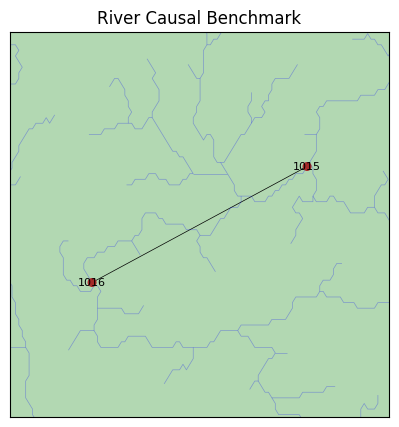

In [445]:
# Single Sample plotting works in the same way.
plot_current_state_of_graph(
    example,
    dpi=100,
    autozoom=0.1,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=30,
    save=0,
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=0.5,
    fs=(5, 5),
    font_size=8,
)

In [7]:

res = pickle.load(open("results/corr_stats_east_germany.p", "rb"))

In [451]:
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data[[str(x) for x in list(example.nodes)]],
    resolution="30min",
    interpolate=False,
    normalize=True,
)

In [51]:
def create_corr_maps_for_all_links(data,ds, ml=250,res = "30min"):

    # If a-> b the value should be below ml.
    stack = []
    for n,example in enumerate(ds):
        label = graph_to_label_tensor(example, human_readable=True)
        # Run some standard preprocessing steps
        sample_data = get_ts_data_for_graph(
            data[[str(x) for x in list(example.nodes)]],
            resolution=res,
            interpolate=False,
            normalize=True,
        )
        corr_peak  = [sample_data[sample_data.columns[0]].shift(x).corrwith(sample_data[sample_data.columns[1]], axis=0).values for x in range(-ml,ml+1)]
        stack.append(corr_peak)
    return stack


In [ ]:
create_corr_maps_for_all_links(data,ds)

In [55]:
example = ds[5]

In [59]:
label = graph_to_label_tensor(example, human_readable=True)
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data[[str(x) for x in list(example.nodes)]],
    resolution="30min",
    interpolate=False,
    normalize=True,
)

In [69]:
# we shift the 2nd column arround. This means that:
# col1 -> col2: Peak should be under 250



corr_peak  = [sample_data[[sample_data.columns[1]]].shift(x).corrwith(sample_data[sample_data.columns[0]], axis=0).values[0] for x in range(-250,250+1)]

<Axes: xlabel='dt'>

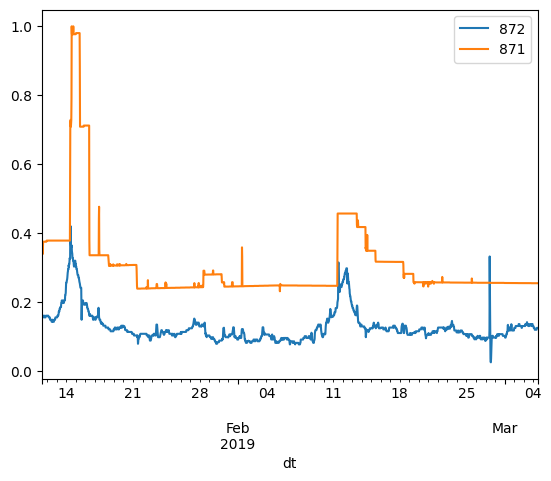

In [78]:
sample_data[500:3000].plot()

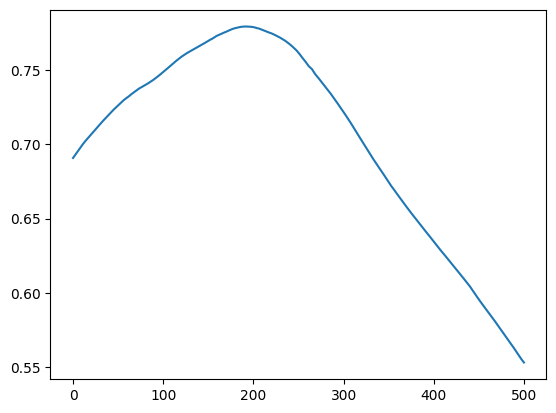

In [70]:
plt.plot(corr_peak)

In [49]:
np.argmax(res[5])

190

In [81]:
ds[5].edges

OutEdgeView([(872, 871)])

In [71]:
graph_to_label_tensor(ds[5], human_readable=True)

Cause     
             871  872
Effect 871   0.0  1.0
       872   0.0  0.0

In [29]:
peaks = [[np.max(x), np.argmax(x)] for x in res]

In [42]:
values = []

for n,x in enumerate(peaks): 

    if x[0] < 0: 
        continue


    if bool(graph_to_label_tensor(ds[3])[0][1]):
        value = (x[1]-250) * -1
    else:
        value = (x[1]-250) * 1
    values.append(value)

In [ ]:
# I dont get it.

In [44]:
values

[4,
 1,
 0,
 -188,
 -60,
 -31,
 -122,
 21,
 0,
 3,
 -131,
 0,
 10,
 -6,
 -48,
 37,
 0,
 1,
 -4,
 -2,
 96,
 62,
 74,
 1,
 3,
 31,
 5,
 23,
 122,
 -1,
 3,
 23,
 3,
 13,
 47,
 -76,
 -4,
 10,
 109,
 1,
 1,
 -99,
 7,
 4,
 2,
 18,
 -5,
 -107,
 0,
 -35,
 -26,
 0,
 250,
 0,
 0,
 -1,
 6,
 0,
 -213,
 1,
 20,
 -56,
 0,
 0,
 1,
 58,
 -4,
 -27,
 5,
 1,
 2,
 120,
 -8,
 -40,
 -100,
 2,
 0,
 -8,
 3,
 0,
 0,
 -216,
 0,
 0,
 10,
 -20,
 -22,
 31,
 0,
 0,
 0,
 1,
 -9,
 3,
 37,
 -250,
 138,
 1,
 0,
 23,
 1,
 0,
 0,
 38,
 235,
 -81,
 2,
 154,
 9,
 4,
 0,
 -10,
 35,
 -16,
 -2,
 6,
 -72,
 96,
 1,
 47,
 -2,
 0,
 5,
 6,
 -26,
 -10,
 0,
 19,
 0,
 72,
 0,
 -24,
 2,
 15,
 -6,
 0,
 2,
 9,
 -105,
 -5,
 1,
 0,
 14,
 -246,
 24,
 39,
 -161,
 0,
 -4,
 22,
 6,
 41,
 3,
 25,
 59,
 0,
 218,
 0,
 -16,
 -1,
 -4,
 186,
 6,
 63,
 1,
 45,
 138,
 0,
 -52,
 -21,
 6,
 -80,
 -8,
 -29,
 2,
 -62,
 105,
 -250,
 0,
 0,
 -32,
 6,
 -2,
 -5,
 45,
 2,
 68,
 -10,
 157,
 0,
 139,
 49,
 76,
 10,
 18,
 0,
 15,
 -7,
 30,
 -2,
 236,
 28,
 39,
 1

(array([ 10.,   9.,  19.,  36., 243., 251.,  29.,  16.,   6.,  19.]),
 array([-250., -200., -150., -100.,  -50.,    0.,   50.,  100.,  150.,
         200.,  250.]),
 <BarContainer object of 10 artists>)

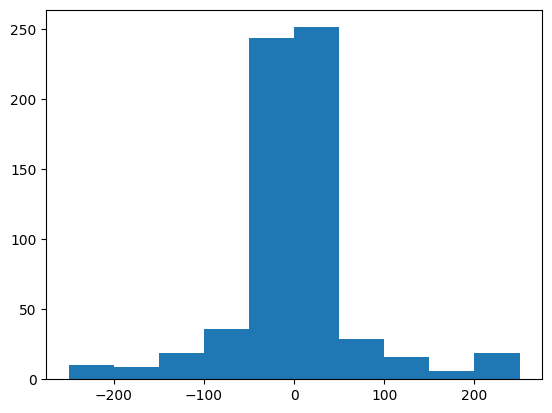

In [41]:
plt.hist(values)

In [23]:
np.argmax(res[3])

62

In [24]:
label

Cause     
             444  445
Effect 444   0.0  1.0
       445   0.0  0.0

In [604]:
def create_corr_maps_for_all_links(ds, ml=250,res = "30min"):
    stack = []
    for n,example in enumerate(ds):
        label = graph_to_label_tensor(example, human_readable=True)
        # Run some standard preprocessing steps
        sample_data = get_ts_data_for_graph(
            data[[str(x) for x in list(example.nodes)]],
            resolution="30min",
            interpolate=False,
            normalize=True,
        )
        corr_peak  = [sample_data.shift(x).corrwith(sample_data[sample_data.columns[0]], axis=0).values[1] for x in range(-ml,ml+1)]
        stack.append(corr_peak)
    return stack

In [503]:
label.values[0,1]

0.0

In [603]:
stack = []
fail = []
for n,example in enumerate(ds):
    label = graph_to_label_tensor(example, human_readable=True)
    # Run some standard preprocessing steps
    sample_data = get_ts_data_for_graph(
        data[[str(x) for x in list(example.nodes)]],
        resolution="30min",
        interpolate=False,
        normalize=True,
    )
    corr_peak  = [sample_data.shift(x).corrwith(sample_data[sample_data.columns[0]], axis=0).values[1] for x in range(-ml,ml+1)]
    stack.append(corr_peak)




KeyboardInterrupt: 

In [ ]:
if max(corr_peak) < 0:
        fail.append(n)
    else:
        corr_peak  = np.argmax(corr_peak) - ml
    
    if bool(label.values[0][1]):
        corr_peak *= -1
    elif bool(label.values[1][0]):
        pass
    else:
        raise ValueError("No link found")

In [ ]:
if max(corr_peak) < 0:
        fail.append(n)
    else:
        corr_peak  = np.argmax(corr_peak) - ml
    
    if bool(label.values[0][1]):
        corr_peak *= -1
    elif bool(label.values[1][0]):
        pass
    else:
        raise ValueError("No link found")

In [596]:
stack

[-4,
 -1,
 0,
 -75,
 [],
 60,
 31,
 -75,
 -21,
 0,
 -3,
 75,
 0,
 -10,
 6,
 48,
 -37,
 0,
 -1,
 4,
 2,
 -75,
 -62,
 -74,
 -1,
 -3,
 -31,
 5,
 -23,
 -75,
 -1,
 -3,
 [-0.606290796187139,
  -0.6061951476073874,
  -0.606061688654381,
  -0.6059436186365321,
  -0.6057798060472863,
  -0.6056607641789321,
  -0.6055075387721242,
  -0.6053859928121703,
  -0.6052616039737616,
  -0.6051563576060967,
  -0.6050100008527645,
  -0.6048833839650422,
  -0.6047645549687308,
  -0.60462789099112,
  -0.6044928899026061,
  -0.6043816514571257,
  -0.604274027171678,
  -0.6041884918685808,
  -0.6040673856811424,
  -0.6039586339772037,
  -0.6038125553383574,
  -0.603671765102244,
  -0.6035030058537093,
  -0.6033470960790432,
  -0.6031847898619267,
  -0.6029958500232239,
  -0.6027781573025172,
  -0.6025600674883504,
  -0.6023722075495321,
  -0.6021474915487927,
  -0.6019154781189695,
  -0.6016902706280965,
  -0.601456387093242,
  -0.6012238750188931,
  -0.6009781642136731,
  -0.6007432709863149,
  -0.60046482557

In [597]:
example = ds[7]
label = graph_to_label_tensor(example, human_readable=True)
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data[[str(x) for x in list(example.nodes)]],
    resolution="30min",
    interpolate=False,
    normalize=True,
)

In [598]:
ml = 750
corr_peak  = [sample_data.shift(x).corrwith(sample_data[sample_data.columns[0]], axis=0).values[1] for x in range(-ml,ml+1)]



In [599]:
label

Cause     
             301  774
Effect 301   0.0  0.0
       774   1.0  0.0

In [600]:
sample_data.corrwith(sample_data[sample_data.columns[0]])

301    1.000000
774    0.011031
dtype: float64

In [601]:
np.argmax(corr_peak) - ml

-122

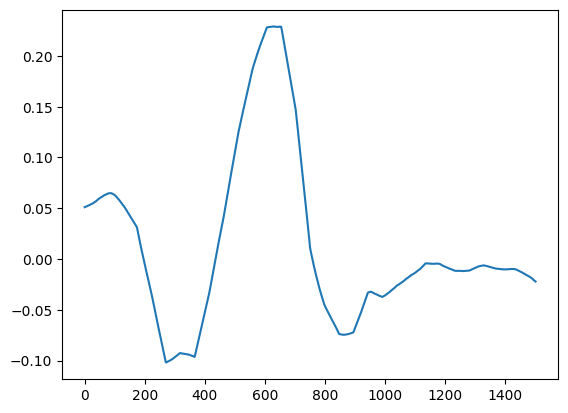

In [602]:
plt.plot(corr_peak)

In [557]:
sample_data["613"] = sample_data["613"].shift(-188)

In [556]:
label

Cause     
             400  613
Effect 400   0.0  0.0
       613   1.0  0.0

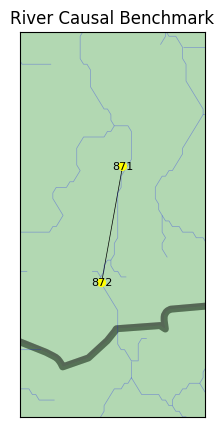

In [586]:
# Single Sample plotting works in the same way.
plot_current_state_of_graph(
    example,
    dpi=100,
    autozoom=0.1,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=30,
    save=0,
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=0.5,
    fs=(5, 5),
    font_size=8,
)

In [530]:
lol = [sample_data.shift(x).corrwith(sample_data[sample_data.columns[0]], axis=0).values[1] for x in range(-ml,ml+1)]

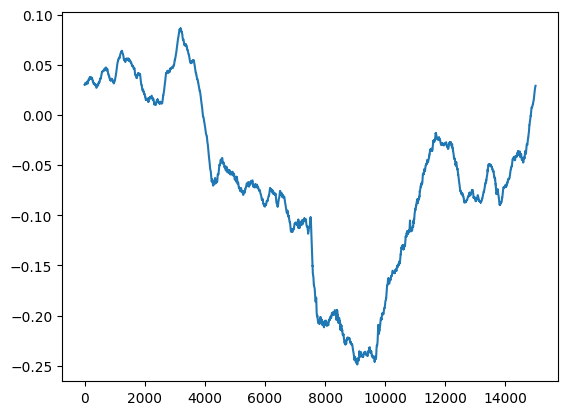

In [532]:
plt.plot(lol)

<Axes: xlabel='dt'>

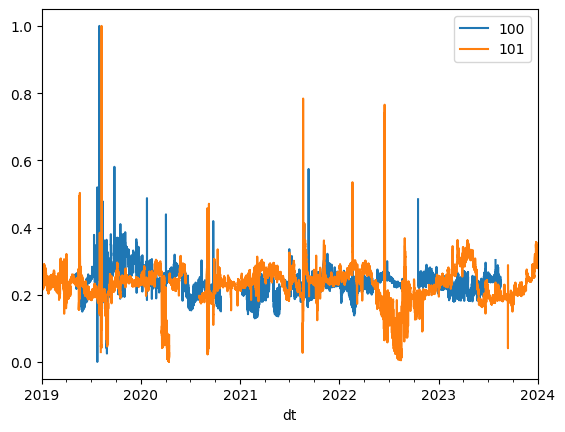

In [515]:
sample_data.plot()

In [539]:
stack

[-4,
 -1,
 0,
 -75,
 [],
 60,
 31,
 -75,
 -21,
 0,
 -3,
 75,
 0,
 -10,
 6,
 48,
 -37,
 0,
 -1,
 4,
 2,
 -75,
 -62,
 -74,
 -1,
 -3,
 -31,
 5,
 -23,
 -75,
 -1,
 -3,
 [-0.606290796187139,
  -0.6061951476073874,
  -0.606061688654381,
  -0.6059436186365321,
  -0.6057798060472863,
  -0.6056607641789321,
  -0.6055075387721242,
  -0.6053859928121703,
  -0.6052616039737616,
  -0.6051563576060967,
  -0.6050100008527645,
  -0.6048833839650422,
  -0.6047645549687308,
  -0.60462789099112,
  -0.6044928899026061,
  -0.6043816514571257,
  -0.604274027171678,
  -0.6041884918685808,
  -0.6040673856811424,
  -0.6039586339772037,
  -0.6038125553383574,
  -0.603671765102244,
  -0.6035030058537093,
  -0.6033470960790432,
  -0.6031847898619267,
  -0.6029958500232239,
  -0.6027781573025172,
  -0.6025600674883504,
  -0.6023722075495321,
  -0.6021474915487927,
  -0.6019154781189695,
  -0.6016902706280965,
  -0.601456387093242,
  -0.6012238750188931,
  -0.6009781642136731,
  -0.6007432709863149,
  -0.60046482557

In [479]:
[sample_data.shift(x).corrwith(sample_data[sample_data.columns[0]], axis=0).values[1] for x in range(-ml,ml+1)]


73

In [468]:
    sample_data.shift(x).corrwith(sample_data["1016"], axis=0).values


array([0.98519878, 0.94230646])

In [466]:
for x in range(150):
    sample_data.shift(-2).corrwith(sample_data["1016"], axis=0).values.T

In [457]:
subselection = sample_data.iloc[n*x:n*(x+1)]
means = subselection.mean()

In [460]:
corr_map = calc_lagged_cross_corr(sample_data,max_lag=ml)

In [534]:
n = 720
ml= 75

In [454]:
x_stack = []
y_stack = []
for x in range(int(len(sample_data) / n)):
    subselection = sample_data.iloc[n*x:n*(x+1)]
    means = subselection.mean()
    corr_map = calc_lagged_cross_corr(subselection,max_lag=ml)
    break
    lag_results = ((corr_map.argmax(axis=2).T - ml)  * label.values).max(axis=0)
    if lag_results.max() == 0: 
        pass
    else:
        x_stack.append(means.values)
        y_stack.append(lag_results)

In [ ]:
            line_X = np.arange(min(X) - general_line_trail, max(X) + general_line_trail)
            fit2 = np.polyval(np.polyfit(X, Y, deg=deg_fit_general), line_X)
            axs[index].plot(
                line_X, fit2, color="black", linestyle="dashed", linewidth=2
            )
            axs[index].set_xlim(
                [min(X) - general_line_trail, max(X) + general_line_trail]
            )

In [407]:
x = 3
subselection = sample_data.iloc[n*x:n*(x+1)]
means = subselection.mean()
corr_map = calc_lagged_cross_corr(subselection,max_lag=ml)

<Axes: xlabel='dt'>

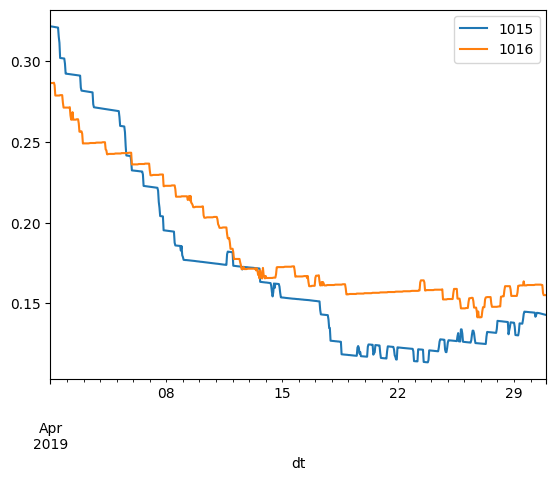

In [408]:
subselection.plot()

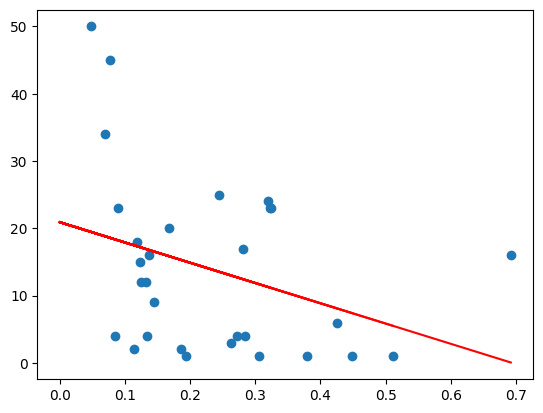

In [409]:
which = 1
# Fit a simple linear regression model to the data
slope, intercept, _, _, _ = linregress(np.array(x_stack)[:,which], np.array(y_stack)[:,which])

# Plot the original data and the regression line
plt.scatter(np.array(x_stack)[:,which],np.array(y_stack)[:,which])
plt.plot(np.linspace(0, np.array(x_stack)[:,which], 100), slope*np.linspace(0, np.array(x_stack)[:,which], 100) + intercept, color='red')
plt.show()

<Axes: xlabel='dt'>

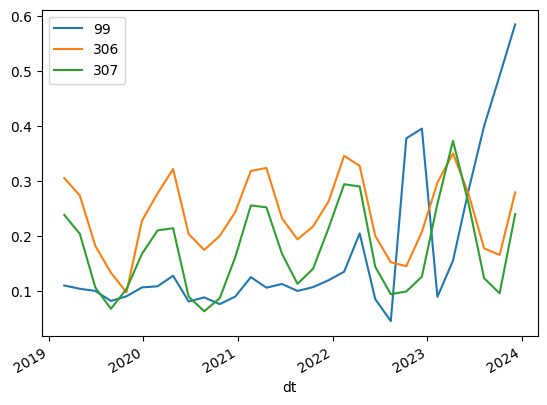

In [191]:
sum_data.plot()

In [ ]:
out_stack

In [85]:
means = sample_data.loc[:sum_data.index[0]].mean()

In [68]:
calc_lagged_cross_corr(sample_data.loc[:sum_data.index[0]]).argmax(axis=2)

array([[500, 626, 990],
       [374, 500, 438],
       [ 10, 562, 500]])

In [70]:
corr_map = calc_lagged_cross_corr(sample_data)

In [88]:
lag_results = ((corr_map.argmax(axis=2).T - corr_map.argmax(axis=2).T[0][0])  * label.values).max(axis=0)

NameError: name 'lag' is not defined

In [92]:
np.stack([means.values,lag_results])

array([[ 0.11241947,  0.3123356 ,  0.2533801 ],
       [10.        , -0.        , 30.        ]])

In [77]:
corr_map.argmax(axis=2).T[0][0]

500